In [1]:
import sys, os
from os.path import abspath, sep, pardir
sys.path.append(abspath('') + sep + pardir)
#create basepath based on folder containing 'DataF2181', 'Analysis', and others
#basepath=abspath('') + sep + pardir


import numpy as np
import matplotlib.pyplot as plt
from Tools.plotting_params import *
from Tools.loading_funcs import basepath,load_grating_evoked_data
#from Tools.plotting_functions import 

In [2]:
from Tools.opm_functions import opm_from_tuning, opm_to_rgb
import matplotlib.transforms as transforms

def clip_std(frame, sigma=3):
    f_mean=np.nanmean(frame)
    f_std=np.nanstd(frame)
    f_white = (frame-f_mean)/f_std
    return np.clip(f_white, a_min=-sigma, a_max=sigma)

tr = transforms.Affine2D().rotate_deg_around(68,80,71)

In [3]:
grating_data_binoc=load_grating_evoked_data(key='binocular',
                            all_dates=['-2','+0','+2','+4','+6'],
                            basepath='..',
                            animal='2181')

In [4]:
all_grating_days = [*grating_data_binoc]
roi=np.asarray(~np.isnan(grating_data_binoc[all_grating_days[0]]['1s'][0,0]), dtype='bool')

Idate=all_grating_days[0]
Jdate=all_grating_days[-1]

grating_data_Iday = np.copy(grating_data_binoc[Idate]['0.5s'][:,:, roi])    
grating_data_Jday = np.copy(grating_data_binoc[Jdate]['0.5s'][:,:, roi]) 


## Figure 1f

In [5]:
istim=[0,0]
itrials=[[0,4,5], [0, 1,2]]
color= "#00ff00"

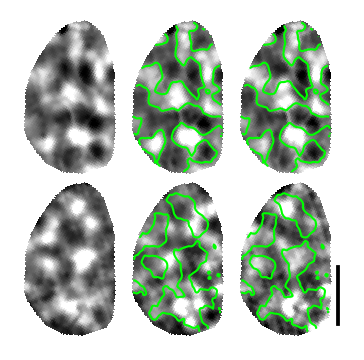

In [6]:


fig, axs=plt.subplots(nrows=2, ncols=3, figsize=cm2inch(4.2, 4.2))
plt.subplots_adjust(hspace=0, wspace=0, top=0.99, bottom=0.01, left=0.01, right=0.99)

#single trial patterns without contour
patternJ=grating_data_Jday[itrials[1][0], istim[1]]
frameJ=np.empty_like(roi)*np.nan
frame=np.empty_like(roi)*np.nan
frameJ[roi]=patternJ
frameJ = frameJ-np.nanmean(frameJ)
for itrial in range(1):
    ax=axs[0,itrial]
    frame[roi]=grating_data_Jday[itrials[1][itrial], istim[1]]
    frame = frame-np.nanmean(frame)
    frame=clip_std(frame, sigma=2)
    ax.imshow(frame,
               transform=tr + ax.transData,
             interpolation='none', cmap="gray")

patternI=grating_data_Iday[itrials[0][0], istim[0]]
frameI=np.empty_like(roi)*np.nan
frame=np.empty_like(roi)*np.nan
frameI[roi]=patternI
frameI = frameI-np.nanmean(frameI)
for itrial in range(1):
    ax=axs[1,itrial]
    frame[roi]=grating_data_Iday[itrials[0][itrial], istim[0]]
    frame = frame-np.nanmean(frame)
    frame=clip_std(frame, sigma=2)
   
    ax.imshow(frame,
               transform=tr + ax.transData,
             interpolation='none', cmap="gray")
    # if itrial==0:
    #     ax.axvspan(95,96, 0.1, 0.1+0.364, color="k" )


#single trial patterns with contour of first trial
patternJ=grating_data_Jday[itrials[1][0], istim[1]]
frameJ=np.empty_like(roi)*np.nan
frame=np.empty_like(roi)*np.nan
frameJ[roi]=patternJ
frameJ = frameJ-np.nanmean(frameJ)
for itrial in range(1,3):
    ax=axs[0,itrial]
    frame[roi]=grating_data_Jday[itrials[1][itrial], istim[1]]
    frame = frame-np.nanmean(frame)
    frame=clip_std(frame, sigma=2)
    #should this be clipped
    ax.imshow(frame,
               transform=tr + ax.transData,
             interpolation='none', cmap="gray")
    ax.contour(frameJ, levels=[0,],
              transform=tr + ax.transData, colors=color, linewidths=0.75)
    #ax.text(62.5, -12, "Trial {}".format(itrial+1), fontsize=8, va='top', ha='center')
    
    
patternI=grating_data_Iday[itrials[0][0], istim[0]]
frameI=np.empty_like(roi)*np.nan
frame=np.empty_like(roi)*np.nan
frameI[roi]=patternI
frameI = frameI-np.nanmean(frameI)
for itrial in range(1,3):
    ax=axs[1,itrial]
    frame[roi]=grating_data_Iday[itrials[0][itrial], istim[0]]
    frame = frame-np.nanmean(frame)
    frame=clip_std(frame, sigma=2)
    #should this be clipped
    ax.imshow(frame,
               transform=tr + ax.transData,
             interpolation='none', cmap="gray")
    
    ax.contour(frameI, levels=[0,],
              transform=tr + ax.transData, colors=color, linewidths=0.75)
    if itrial==2:
        ax.axvspan(95,96, 0.1, 0.1+0.364, color="k" )

for ax in axs.flatten():
    ax.axis("off");
    ax.axis([25,100,130,20])

plt.show()
fig.savefig("Fig1c_singletrials_only last.pdf", dpi=500)


In [7]:
colorset =["#e41a1c",
               "#377eb8",
               "#4daf4a",
               "#984ea3",
               "#ff7f00",
               "#ffff33",
               "#a65628",]

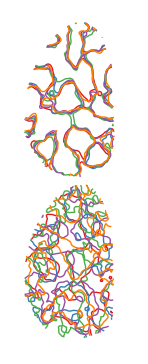

In [8]:
fig, axs=plt.subplots(nrows=2, ncols=1, figsize=cm2inch(1.4, 4.2))
plt.subplots_adjust(hspace=0, wspace=0, top=0.99, bottom=0.01, left=0.01, right=0.99)
#iday

#single trial patterns
patternJ=grating_data_Jday[itrials[1][0], istim[1]]
frameJ=np.empty_like(roi)*np.nan
frame=np.empty_like(roi)*np.nan
frameJ[roi]=patternJ
ax=axs[0]
for itrial in range(5):
    
    frame[roi]=grating_data_Jday[itrial, istim[1]]
    frame = frame-np.nanmean(frame)
    ax.contour(frame, levels=[0,],
              transform=tr + ax.transData, colors=colorset[itrial], linewidths=0.5)
#ax.text(62.5, -12, "Repeated\ntrials".format(itrial+1), fontsize=8, va='top', ha='center')
    
    

    
frame=np.empty_like(roi)*np.nan
ax=axs[1]
for itrial, idx in enumerate([0,1,3,4,5]):
    
    frame[roi]=grating_data_Iday[idx, istim[1]]
    frame = frame-np.nanmean(frame)
    ax.contour(frame, levels=[0,],
              transform=tr + ax.transData, colors=colorset[itrial], linewidths=0.5)
    



for ax in axs.flatten():
    ax.axis("off");
    ax.axis([25,100,130,20])

plt.show()
fig.savefig("Fig1f_contours.pdf", dpi=500)


